In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

In [33]:
import matplotlib as mpl

mpl.style.use('seaborn-paper')

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [34]:
def read_all_iterations(paths):
    all_iter_results = []
    for path in paths:
        iter_result = np.loadtxt(path)
        all_iter_results.append(iter_result)
    return all_iter_results

def get_paths_to_res(sinkhorn='base', results_path = '../results/multi'):
    flows_paths = sorted(glob(f'{results_path}/flows/{sinkhorn}*'))
    times_paths = sorted(glob(f'{results_path}/times/{sinkhorn}*'))
    corr_matrix_paths = sorted(glob(f'{results_path}/corr_matrix/{sinkhorn}*'))
    inverse_func_paths = sorted(glob(f'{results_path}/inverse_func/{sinkhorn}*'))
    subg_paths = sorted(glob(f'{results_path}/subg/{sinkhorn}*'))
        
    return flows_paths, times_paths, corr_matrix_paths, inverse_func_paths, subg_paths

def read_all_res(paths):
    flows_paths, times_paths, corr_matrix_paths, inverse_func_paths, subg_paths = paths
    all_flows = read_all_iterations(flows_paths)
    all_times = read_all_iterations(times_paths)
    all_corr_matrix = read_all_iterations(corr_matrix_paths)
    all_inverse_func = read_all_iterations(inverse_func_paths)
    all_subg = read_all_iterations(subg_paths)
    return all_flows, all_times, all_corr_matrix, all_inverse_func, all_subg


acc_paths = get_paths_to_res(sinkhorn='accelerated')
all_flows, all_times, all_corr_matrix, all_inverse_func, all_subg = read_all_res(acc_paths)

base_paths = get_paths_to_res(sinkhorn='base')
all_flows_base, all_times_base, all_corr_matrix_base, all_inverse_func_base, all_subg_base = read_all_res(base_paths)



In [35]:
diffs = []
for i in range(len(all_corr_matrix)):
    diff = np.sum((all_corr_matrix[i] - all_corr_matrix_base[i])**2) / (all_corr_matrix[i].shape[0] **2)
    diffs.append(diff)


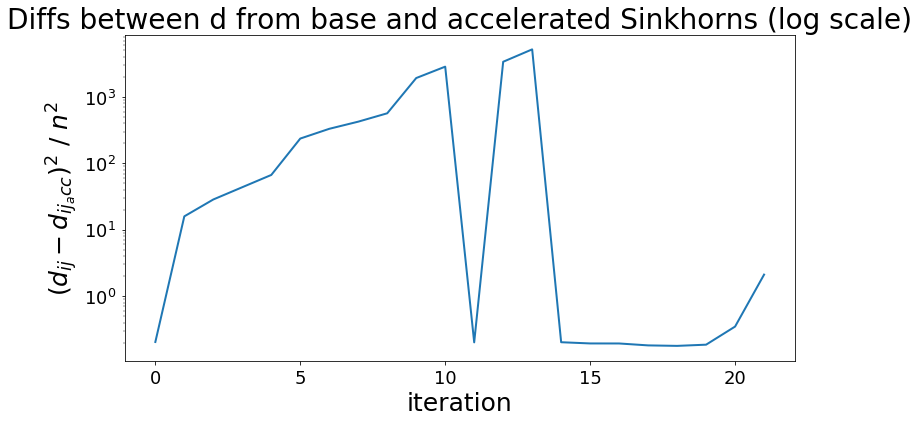

In [37]:
plt.figure(figsize=(12,6))
plt.title("Diffs between d from base and accelerated Sinkhorns (log scale)")
plt.xlabel('iteration')
plt.ylabel('$(d_{ij} - d_{ij_acc})^2 ~/~ n^2$') 
plt.plot(diffs[:])
plt.yscale('log')
plt.show()

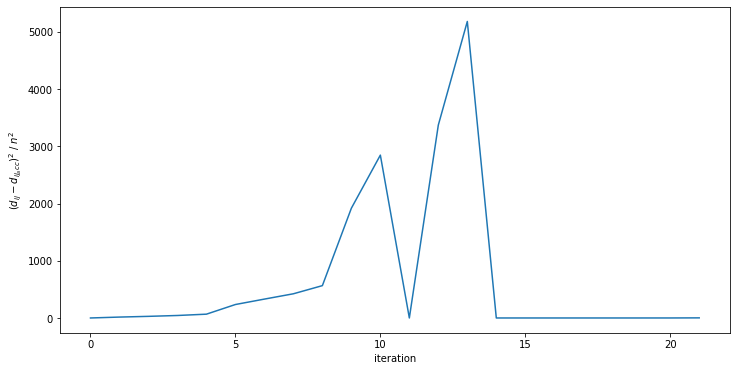

In [30]:
plt.figure(figsize=(12,6))
plt.xlabel('iteration')
plt.ylabel('$(d_{ij} - d_{ij_acc})^2 ~/~ n^2$') 
plt.plot(diffs[:])
#plt.yscale('log')
plt.show()